# Pixel histogram time-series

In this tutorial we are going to plot a histogram time-series, to explore the change over time in pixel intensity values.

Let's begin by loading in many of the packages we have already worked with in this class. 

Specifically, `rasterio`, `numpy` and `matplotlib`.

In [1]:
# Example
%matplotlib inline
import rasterio
import numpy
from matplotlib import pyplot as plt

For the sake of consistency, let's continue working on the the Shenandoah River image, from the Shenandoah Valley, which we explored in the previous tutorial. 


In [11]:
# Example
# Our single 4 band (blue, green, red, NIR) PlanetScope image.
image_file = "../week10/shenandoah_valley.tif"

# Let's get our rasterio object:
my_image = rasterio.open(image_file)
my_image

<open DatasetReader name='../week10/shenandoah_valley.tif' mode='r'>

Now we have our first image, we can parse out our four bands into individual variable names for blue, green, red and near-infrared.

In [3]:
# Example
# The PlanetScope band order is BGRN.
blue, green, red, nir = my_image.read()
blue

array([[3907, 3902, 3884, ..., 3928, 3922, 3856],
       [3836, 3859, 3898, ..., 3917, 3888, 3867],
       [3773, 3853, 3925, ..., 3916, 3892, 3864],
       ...,
       [3920, 3940, 3991, ..., 3750, 3800, 3808],
       [3900, 3956, 3990, ..., 3774, 3786, 3771],
       [3910, 3953, 3949, ..., 3786, 3760, 3755]], dtype=uint16)

For the sake of this example, for the second image, we are going to load in the same image again and alter some of the pixel color values. 

This is a good example of a minimum reproducible example (reprex). Obviously, you will need to replace this with your second, third, forth etc., time series image.  

In [17]:
# Example
# Dummy example of a second image. 
# Let's change the original values as the quickest reprex way to demonstrate this example. 
blue_t2, green_t2, red_t2, nir_t2 = my_image.read() * 2 
blue_t2

array([[7814, 7804, 7768, ..., 7856, 7844, 7712],
       [7672, 7718, 7796, ..., 7834, 7776, 7734],
       [7546, 7706, 7850, ..., 7832, 7784, 7728],
       ...,
       [7840, 7880, 7982, ..., 7500, 7600, 7616],
       [7800, 7912, 7980, ..., 7548, 7572, 7542],
       [7820, 7906, 7898, ..., 7572, 7520, 7510]], dtype=uint16)

Now, let's setup the four panel figure we explored last week. 

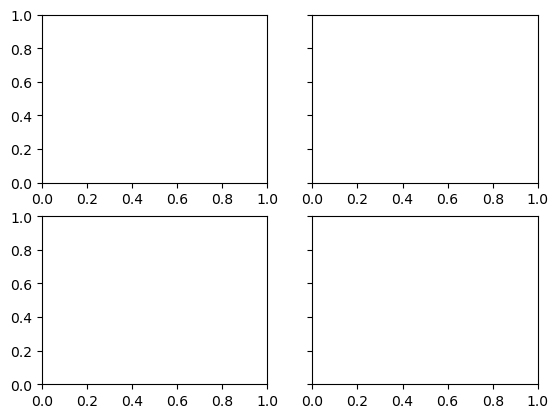

In [19]:
# Example
# Create twoxtwo subplots and unpack the output array
fig, (ax1, ax2) = plt.subplots(2, 2, sharey=True) 

And first, we need to exclude any missing data, so we have only valid values. 

In [6]:
# Example
# Let's get our data
blue_data = blue[numpy.not_equal(blue, my_image.nodata)]
red_data = red[numpy.not_equal(red, my_image.nodata)]
green_data = green[numpy.not_equal(green, my_image.nodata)]
nir_data = nir[numpy.not_equal(nir, my_image.nodata)]

blue_data_t2 = blue_t2[numpy.not_equal(blue_t2, my_image.nodata)]
red_data_t2 = red_t2[numpy.not_equal(red_t2, my_image.nodata)]
green_data_t2 = green_t2[numpy.not_equal(green_t2, my_image.nodata)]
nir_data_t2 = nir_t2[numpy.not_equal(nir_t2, my_image.nodata)]

Now let's set up our histogram layers. 

Here the trick is we will this time provide a label for each data layer, e.g. `label='t1'` for our first time point image, or `label='t2'` for our second time point image.


In [7]:
# Example
bin_number = 50
# Specify the .hist() function to create the hist
ax1[0].hist(blue_data, color='lightblue', bins=bin_number, label='t1', alpha=0.5)
ax1[1].hist(red_data, color='lightpink', bins=bin_number, label='t1', alpha=0.5)
ax2[0].hist(green_data,  color='lightgreen', bins=bin_number, label='t1', alpha=0.5)
ax2[1].hist(nir_data, color='lightgrey', bins=bin_number, label='t1', alpha=0.5)

ax1[0].hist(blue_data_t2,  color='darkblue', bins=bin_number, label='t2', alpha=1)
ax1[1].hist(red_data_t2,  color='darkred',bins=bin_number, label='t2', alpha=1)
ax2[0].hist(green_data_t2,  color='darkgreen',bins=bin_number, label='t2', alpha=1)
ax2[1].hist(nir_data_t2,  color='darkgray',bins=bin_number, label='t2', alpha=1)

(array([1.83400e+03, 2.24830e+04, 2.10150e+04, 1.12450e+04, 7.03700e+03,
        5.43500e+03, 4.55800e+03, 4.01300e+03, 4.37800e+03, 4.84200e+03,
        5.64700e+03, 7.35100e+03, 1.03240e+04, 1.59370e+04, 2.45590e+04,
        3.87360e+04, 5.82940e+04, 8.51380e+04, 1.18235e+05, 1.58897e+05,
        2.02936e+05, 2.39251e+05, 2.65536e+05, 2.68991e+05, 2.53578e+05,
        2.23069e+05, 1.84961e+05, 1.50616e+05, 1.25044e+05, 1.07477e+05,
        9.45160e+04, 8.25290e+04, 7.07980e+04, 5.85990e+04, 4.75450e+04,
        3.49260e+04, 2.53760e+04, 1.79690e+04, 1.28600e+04, 8.33800e+03,
        5.76000e+03, 4.09100e+03, 2.41300e+03, 1.34900e+03, 7.45000e+02,
        3.74000e+02, 1.47000e+02, 9.00000e+01, 2.80000e+01, 9.00000e+00]),
 array([ 2574.  ,  3061.16,  3548.32,  4035.48,  4522.64,  5009.8 ,
         5496.96,  5984.12,  6471.28,  6958.44,  7445.6 ,  7932.76,
         8419.92,  8907.08,  9394.24,  9881.4 , 10368.56, 10855.72,
        11342.88, 11830.04, 12317.2 , 12804.36, 13291.52, 13778.


The alpha value merely indicates how transparent the color should be for that layer. Thus, `alpha=1` is the normal color, whereas `alpha=0.5` makes the color shade 50% more transparent. We do this so we can still see the distribution if there are overlaps with other time period histograms. 

Now we must add in our plot titles, and importantly, the legend for each plot. 

In [8]:
# Example
# Now add plot titles 
ax1[0].set_title('Blue Histogram')
ax1[1].set_title('Red Histogram')
ax2[0].set_title('Green Histogram')
ax2[1].set_title('NIR Histogram')

# Let's add an overall title to a plot
# The y argument moves the title higher, so we don't have overlapping text
plt.suptitle('Histogram Panel-Plot by Band', y=1.05)  

# Now add plot legends 
# This is essential to make sure you differentiate your image histograms
ax1[0].legend(loc='upper right')
ax1[1].legend(loc='upper right')
ax2[0].legend(loc='upper right')
ax2[1].legend(loc='upper right')

<Figure size 640x480 with 0 Axes>

Finally, let us export our new time series figure.

In [9]:
# This makes sure we have sufficient space between our plots
fig.tight_layout()

# Now export the final plot!
fig.savefig("histogram_time_series.png", dpi=200, bbox_inches='tight', pad_inches=0.7)